## TSF GRIP  **Task#4**
##  **Author :** Ahmed Tarek Elsayed

+ Dataset: https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly .express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
data=pd.read_csv('/content/drive/MyDrive/Intern/Spark_Intern/globalterrorismdb_0718dist.csv',encoding='latin-1')
data.head()

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  197000000001   1970       7     2  ...        0         0       0      NaN
1  197000000002   1970       0     0  ...        1         1       1      NaN
2  197001000001   1970       1     0  ...       -9         1       1      NaN
3  197001000002   1970       1     0  ...       -9         1       1      NaN
4  197001000003   1970       1     0  ...       -9         1       1      NaN

[5 rows x 135 columns]

In [17]:
data.shape

(181691, 135)

In [18]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [19]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [20]:
data.rename(columns={'iyear':'year', 'imonth':'month','country_txt':'Country', 'region_txt':'Region','provstate':'State', 'attacktype1_txt':'Attack Type','targtype1_txt':'Target Type', 'targsubtype1_txt':'Target SubType','target1':'Target','gname':'Group Name','weaptype1_txt':'Weapon Type','weapsubtype1_txt':'Weapon Subtype','nkill':'Killed','nwound':'Wounded','propcomment':'Property Damage'},inplace= True)
data.head()

eventid  year  month  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  197000000001  1970      7     2  ...        0         0       0      NaN
1  197000000002  1970      0     0  ...        1         1       1      NaN
2  197001000001  1970      1     0  ...       -9         1       1      NaN
3  197001000002  1970      1     0  ...       -9         1       1      NaN
4  197001000003  1970      1     0  ...       -9         1       1      NaN

[5 rows x 135 columns]

In [21]:
data= data[['year','month','Country','Region','State','city','location','latitude','longitude','success','Attack Type','Target Type','Target SubType','Target','Group Name','motive','Weapon Type','Weapon Subtype','Killed','Wounded','Property Damage']]
data.head()

year  month             Country  ... Killed Wounded Property Damage
0  1970      7  Dominican Republic  ...    1.0     0.0             NaN
1  1970      0              Mexico  ...    0.0     0.0             NaN
2  1970      1         Philippines  ...    1.0     0.0             NaN
3  1970      1              Greece  ...    NaN     NaN             NaN
4  1970      1               Japan  ...    NaN     NaN             NaN

[5 rows x 21 columns]

Text(0.5, 1.0, 'Top 50 terrorism-prone countries')

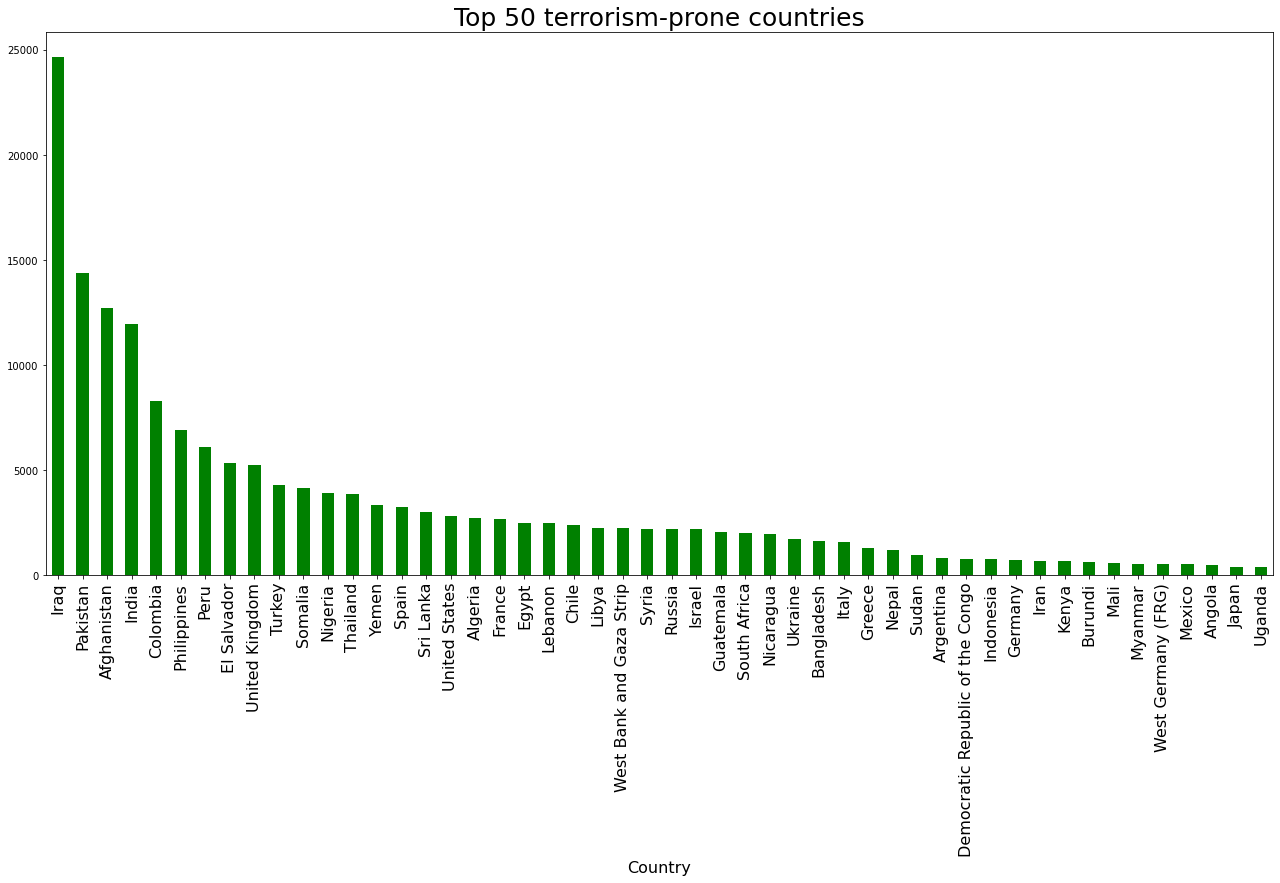

In [22]:
ctry= data['Country'].value_counts()[:50]
ctry.plot.bar(figsize=(22,10), color='green')
plt.xlabel('Country',fontsize=16)
plt.xticks(fontsize=16)
plt.title('Top 50 terrorism-prone countries', fontsize=25)

Text(0.5, 1.0, 'Top 50 terrorism-prone cities')

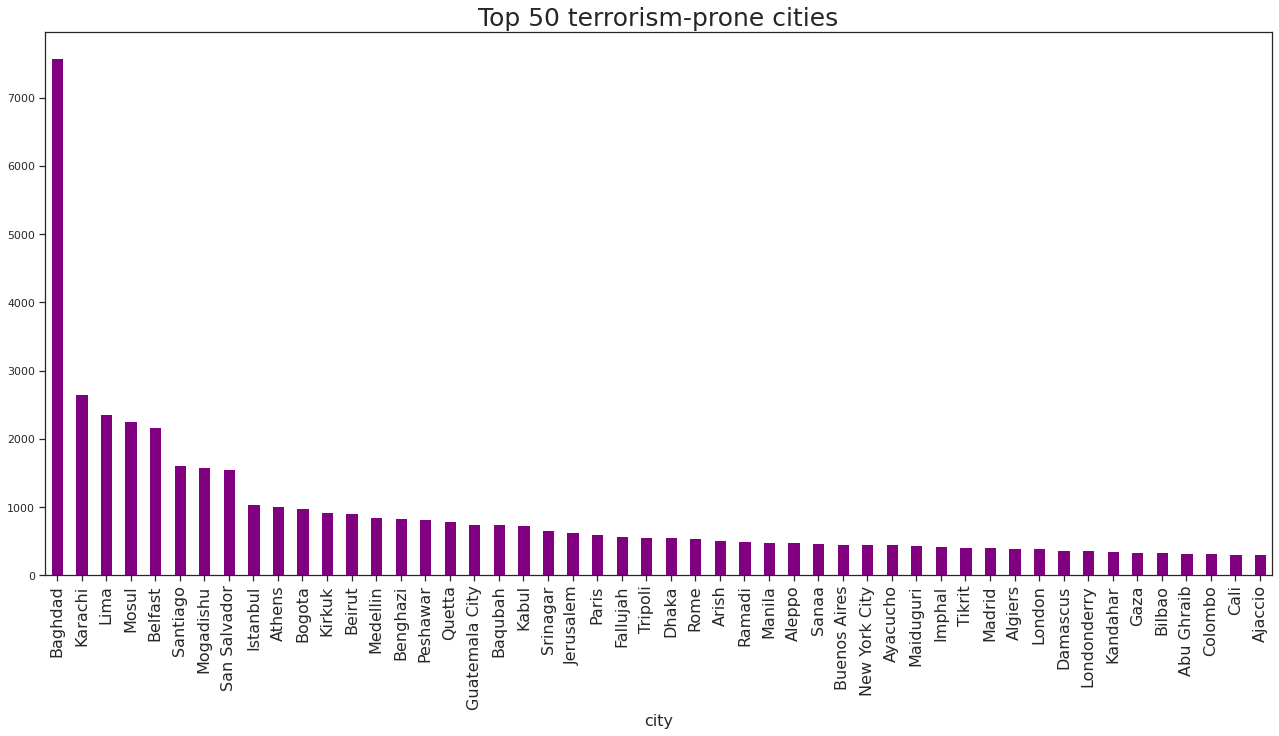

In [53]:
cty= data['city'].value_counts()[1:51]
cty.plot.bar(figsize=(22,10), color='purple')
plt.xlabel('city',fontsize=16)
plt.xticks(fontsize=16)
plt.title('Top 50 terrorism-prone cities', fontsize=25)

Text(0.5, 1.0, 'Terrorism-prone Regions')

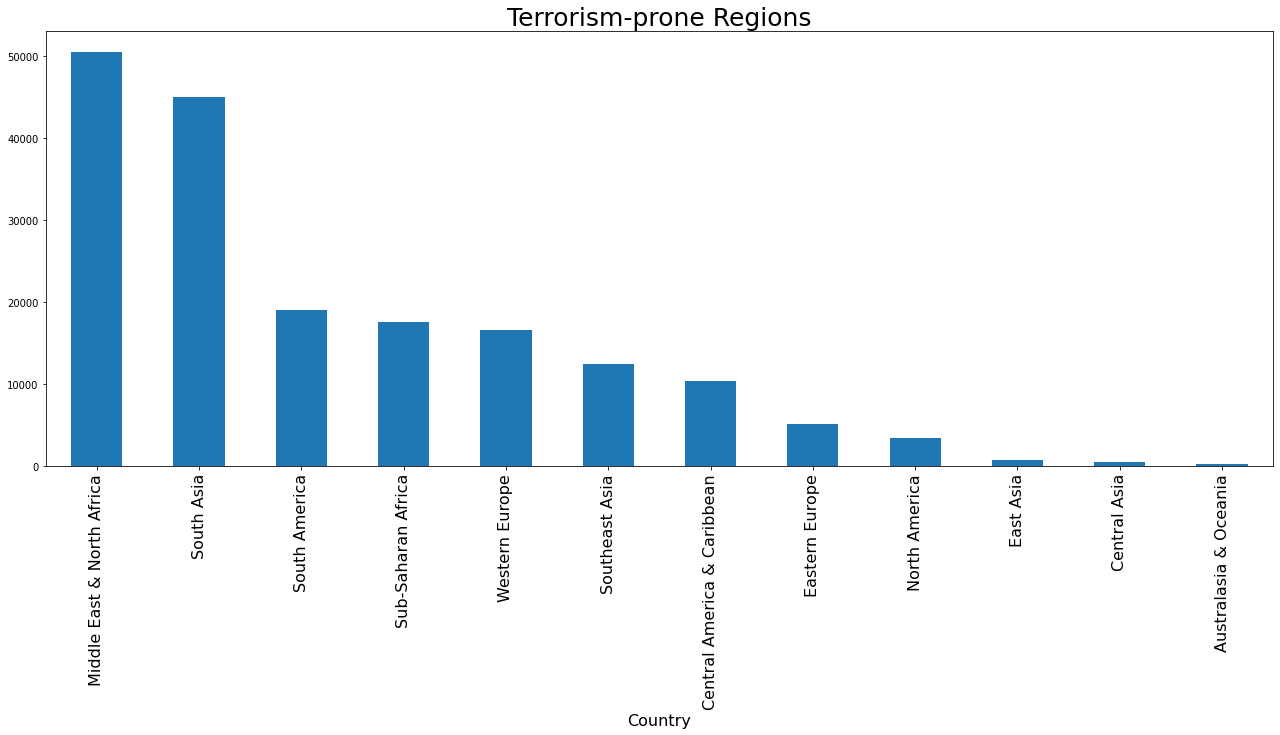

In [23]:
region= data['Region'].value_counts()
region.plot.bar(figsize=(22,8))
plt.xlabel('Country',fontsize=16)
plt.xticks(fontsize=16)
plt.title('Terrorism-prone Regions', fontsize=25)

Text(0.5, 0, 'Target-type')

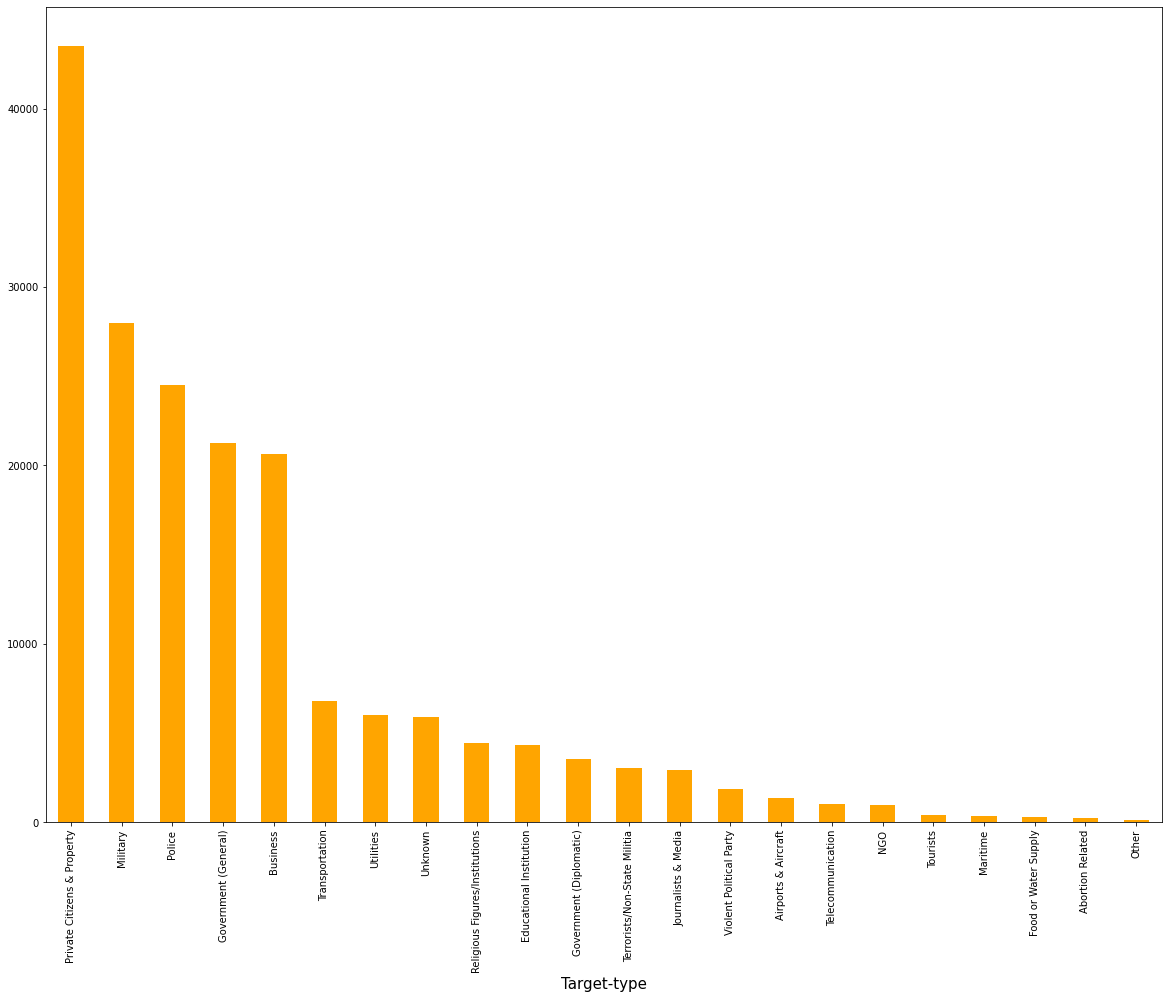

In [24]:
at= data['Target Type'].value_counts()
at.plot.bar(color='orange',figsize=(20,15))
plt.xlabel('Target-type',fontsize=15)

Text(0.5, 1.0, 'Region-wise terrorism over the years')

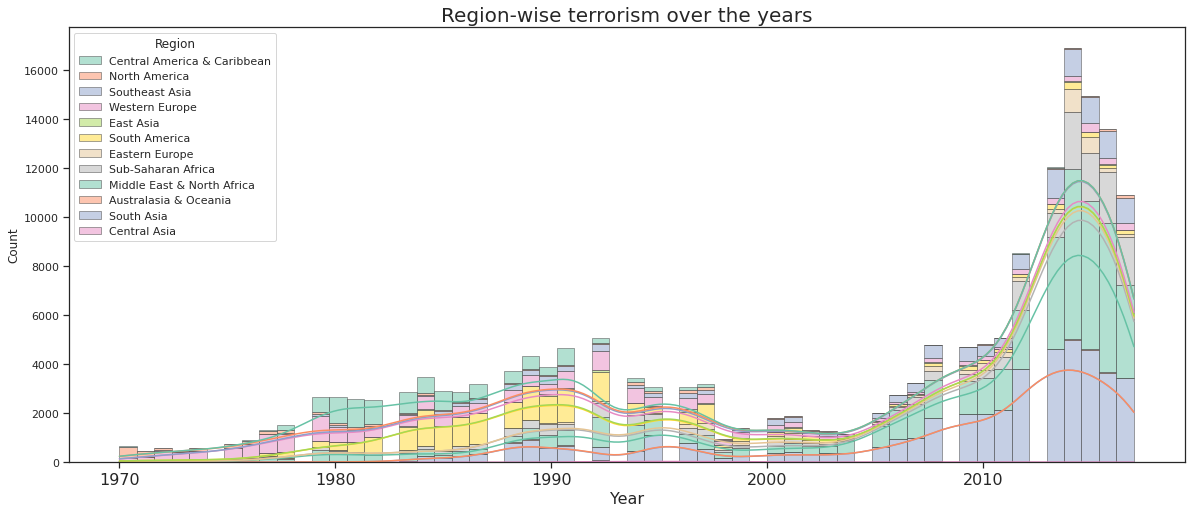

In [35]:
plt.figure(figsize=(20,8))
sns.set_theme(style="ticks")
sns.histplot(
    data,
    x="year", hue="Region",
    multiple="stack",
    palette="Set2",
    edgecolor=".3",
    linewidth=.5,
    log_scale= False,
    kde=True

)
plt.xlabel('Year',fontsize=16)
plt.xticks(fontsize=16)
plt.title('Region-wise terrorism over the years', fontsize=20)

In [101]:
fig=px.histogram(data,x='year',color='Region',title='Region-wise terrorism over the years')
fig.show()

In [134]:
fig=px.histogram(data,x='Region',color='Attack Type',title='Region-wise terrorism over the years',animation_frame="year")
fig.update_xaxes(
        tickangle = 20,
        title=None)
fig.show()

In [60]:
data.groupby('Attack Type')['Killed','Wounded'].count()


Killed  Wounded
Attack Type                                         
Armed Assault                         40353    38392
Assassination                         19233    17986
Bombing/Explosion                     84322    82678
Facility/Infrastructure Attack         9788     9656
Hijacking                               606      592
Hostage Taking (Barricade Incident)     898      844
Hostage Taking (Kidnapping)            8610     8138
Unarmed Assault                        1001      922
Unknown                                6567     6172

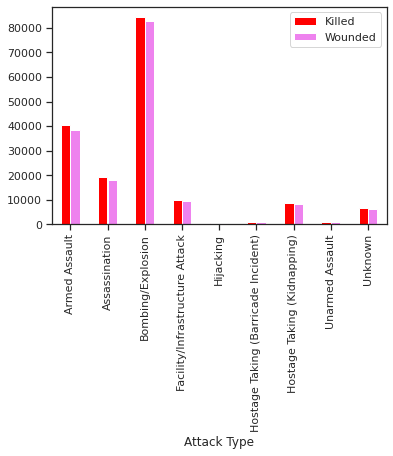

In [61]:
attack=data.groupby('Attack Type')['Killed','Wounded'].count()
attack.plot.bar(color=['red','violet'])

Text(0.5, 1.0, 'Top 10 Terrorist Groups')

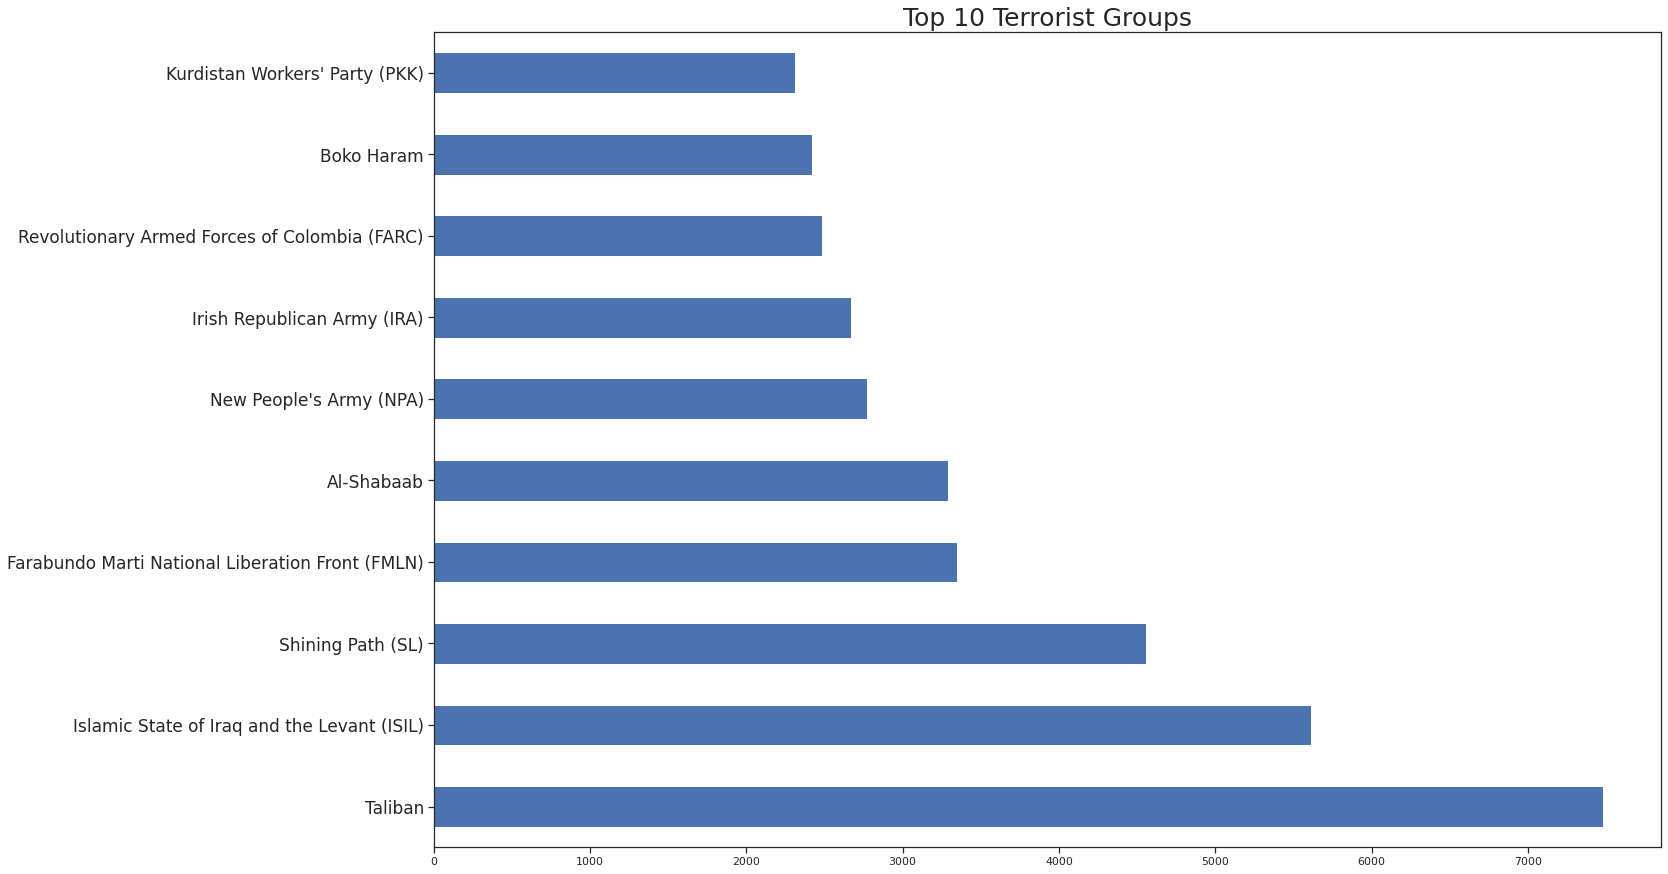

In [82]:
at_10= data['Group Name'].value_counts().drop('Unknown')[:10]
at.plot.barh(figsize=(22,15))
plt.yticks(fontsize=17)
plt.title('Top 10 Terrorist Groups', fontsize=25)

In [63]:
print('Number of successful attacks: ',data['success'].sum())


Number of successful attacks:  161632


# Conclusion
+ Regions of Middle East and North Africa are most prone to terrorism, while Iraq is the most prone country.
+ Baghdad is the most prone city
+The most targeted areas were Private citizens and property.
+There has been a continuous increase in terrorism from 1970, the maximum being in the year 2014.
+Bombing and Explosion caused the most number of wounded people and killings.
+Taliban, ISIL,SL are the most active terrorist groups.